iter: 0, w1: 0.25, w2: 0.25, b: -0.5,
iter: 5, w1: -0.748, w2: -0.302, b: -0.522,
iter: 10, w1: -1.565, w2: -0.167, b: 0.256,
iter: 15, w1: -1.966, w2: -0.596, b: 0.604,
iter: 20, w1: -2.318, w2: -0.67, b: 0.528,
iter: 25, w1: -2.683, w2: -0.499, b: 0.258,
iter: 30, w1: -2.834, w2: -0.48, b: 0.361,
iter: 35, w1: -2.903, w2: -0.712, b: 0.58,
x: [-1.  -0.5 -0.5], predict: 1
x: [-1.  -0.5  0.5], predict: 1
x: [-1.   0.3 -0.5], predict: -1
x: [-1.  -0.1  1. ], predict: -1


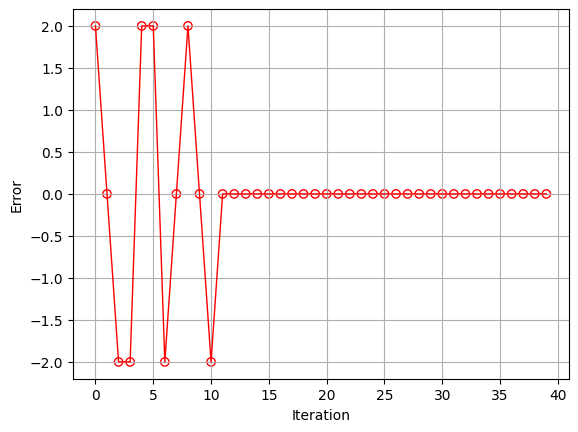

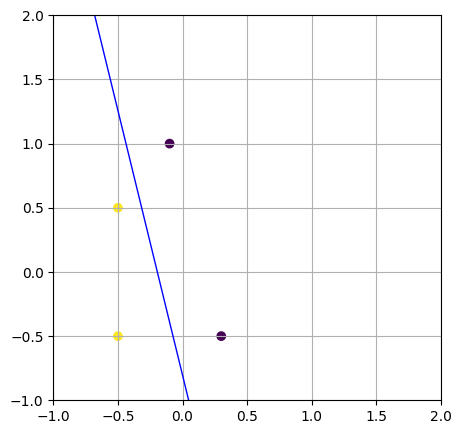

In [15]:
# 二維特徵

import numpy as np
import matplotlib.pyplot as plt

class AdaLine:
    def __init__(self, n_features, lr=0.1):

        # 初始化權重為 1
        self.w = np.ones(n_features + 1)
        self.lr = lr

    # 計算 activation potential value
    def forward(self, x):
        return np.dot(self.w, x)   
    
    # 計算 error 並更新權重
    def backward(self, x, u, d):
        self.w = self.w + self.lr * (d - u) * x

    # 計算 error signal
    def loss(self, u, d):
        return d - (1 if u >= 0 else -1)

    # 預測 class
    def predict(self, x):
        u = self.forward(x)
        return 1 if u >= 0 else -1
        
EPOCH = 10

features = np.array([[-0.5, -0.5],   
                    [-0.5, 0.5],
                    [0.3, -0.5],
                    [-0.1, 1.0]])

theta = -1.0

# x_all : [bias, x1, x2]
x_all = np.concatenate((np.ones((features.shape[0], 1)) * theta, features), axis=1)  

d_all = np.array([1, 1, -1, -1])  # labels


model = AdaLine(2, 0.5)

iteration = 0
err_sign_arr = []

for _ in range(EPOCH):
    for x, d in zip(x_all, d_all):
        u = model.forward(x)
        model.backward(x, u, d)
        error_sign = model.loss(u, d)
        err_sign_arr.append(error_sign)
        if iteration % 5 == 0:
            print(f'iter: {iteration}, w1: {round(model.w[1], 3)}, w2: {round(model.w[2], 3)}, b: {round(model.w[0], 3)},')
        iteration += 1

for x in x_all:
    print(f'x: {x}, predict: {model.predict(x)}')

plt.grid()
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.plot(range(iteration), err_sign_arr, color='red', linewidth=1)
plt.scatter(range(iteration), err_sign_arr, marker='o', color='red', facecolors='none')

plt.figure(figsize=(5, 5))
plt.xlim(-1.0, 2.0)
plt.ylim(-1.0, 2.0)
plt.grid()
plt.scatter(x_all[:, 1], x_all[:, 2], c=d_all)

plot_x = np.linspace(-1.0, 2.0, 10)
plot_y = (model.w[0] - model.w[1] * plot_x) / model.w[2]
plt.plot(plot_x, plot_y, color='blue', linewidth=1)

iter: 0, w1: 0.35, w2: 0.35, w3: 1.52, b: -0.3,
iter: 5, w1: -0.916, w2: -0.389, w3: 0.805, b: -0.247,
iter: 10, w1: -1.821, w2: -0.197, w3: 0.057, b: 0.428,
iter: 15, w1: -2.215, w2: -0.561, w3: -0.316, b: 0.566,
iter: 20, w1: -2.504, w2: -0.617, w3: -0.403, b: 0.412,
iter: 25, w1: -2.77, w2: -0.466, w3: -0.433, b: 0.132,
iter: 30, w1: -2.829, w2: -0.479, w3: -0.504, b: 0.099,
iter: 35, w1: -2.843, w2: -0.628, w3: -0.676, b: 0.207,
x: [-1.  -0.5 -0.5  0.4], predict: 1
x: [-1.  -0.5  0.5  0.3], predict: 1
x: [-1.   0.3 -0.5  0.6], predict: -1
x: [-1.  -0.1  1.   0.8], predict: -1


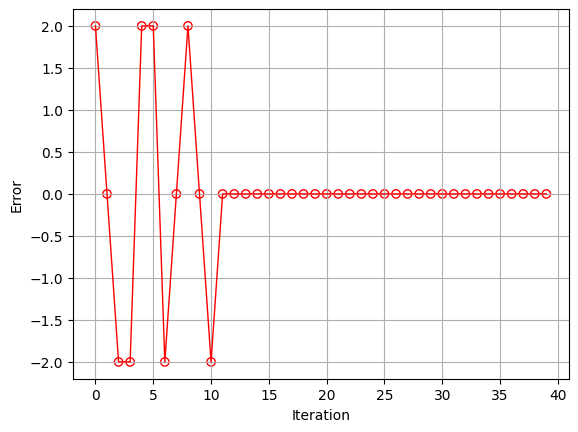

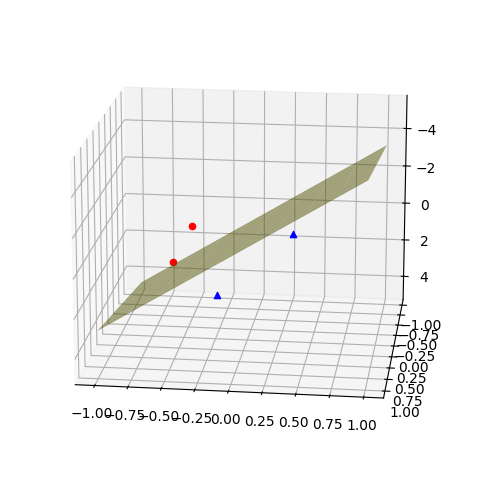

In [25]:
# 三維特徵

import numpy as np
import matplotlib.pyplot as plt

class AdaLine:
    def __init__(self, n_features, lr=0.1):

        # 初始化權重為 1
        self.w = np.ones(n_features + 1)
        self.lr = lr

    # 計算 activation potential value
    def forward(self, x):
        return np.dot(self.w, x)   
    
    # 計算 error 並更新權重
    def backward(self, x, u, d):
        self.w = self.w + self.lr * (d - u) * x

    # 計算 error signal
    def loss(self, u, d):
        return d - (1 if u >= 0 else -1)

    # 預測 class
    def predict(self, x):
        u = self.forward(x)
        return 1 if u >= 0 else -1
        
EPOCH = 10

# 輸入三維特徵
features = np.array([[-0.5, -0.5, 0.4],   
                    [-0.5, 0.5, 0.3],
                    [0.3, -0.5, 0.6],
                    [-0.1, 1.0, 0.8]])

theta = -1.0

# x_all : [bias, x1, x2]
x_all = np.concatenate((np.ones((features.shape[0], 1)) * theta, features), axis=1)  

d_all = np.array([1, 1, -1, -1])  # labels

# 將 features 設定成三維
model = AdaLine(3, 0.5)

iteration = 0
err_sign_arr = []

for _ in range(EPOCH):
    for x, d in zip(x_all, d_all):
        u = model.forward(x)
        model.backward(x, u, d)
        error_sign = model.loss(u, d)
        err_sign_arr.append(error_sign)
        if iteration % 5 == 0:
            print(f'iter: {iteration}, w1: {round(model.w[1], 3)}, w2: {round(model.w[2], 3)}, w3: {round(model.w[3], 3)}, b: {round(model.w[0], 3)},')
        iteration += 1

for x in x_all:
    print(f'x: {x}, predict: {model.predict(x)}')

plt.grid()
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.plot(range(iteration), err_sign_arr, color='red', linewidth=1)
plt.scatter(range(iteration), err_sign_arr, marker='o', color='red', facecolors='none')

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# 畫出原始資料
for x, d in zip(x_all, d_all):
    if d == 1:
        ax.scatter(x[1], x[2], x[3], color='r', marker='o')  
    else:
        ax.scatter(x[1], x[2], x[3], color='b', marker='^')  


w0, w1, w2, w3 = model.w[0], model.w[1], model.w[2], model.w[3]
plot_x = np.linspace(-1.0, 1.0, 10)
plot_y = np.linspace(-1.0, 1.0, 10)
plot_x, plot_y = np.meshgrid(plot_x, plot_y)
plot_z = (w0 - w1 * plot_x - w2 * plot_y) / w3  # 決策邊界平面

ax.plot_surface(plot_x, plot_y, plot_z, color='y', alpha=0.5)
ax.view_init(elev=-163, azim=-97)

plt.show()